## What are the Saddest Mitski and Phoebe Bridgers Songs?
Becca Flach, Lexi Deeter, Kelsey McClung

### Introduction:

As Spotify and other music streaming platforms have risen in both their popularity and their performance, the quantity of music being consumed globally has greatly increased. The ability to create and share playlists globally has opened new doors for fans to share their opinions about their favorite (and least favorite) artists on a much wider scale than ever before. With millions of listeners tuning in to Spotify around the clock, many interesting patterns have emerged, simply waiting to be explored using Spotify’s API. 

Though the recognition that artists receive for their efforts varies widely day-to-day, some musicians stand separate from the rest, having developed a certain reputation for themselves. The artists Phoebe Bridgers and Mistki are two artists well known for their uniquely sorrowful songwriting, a reputation so cemented that fans have taken to making Spotify playlists with titles such as “phoebe bridgers ranked from saddest to least-sad” (from Spotify user ‘tesz’) to rank both Phoebe’s and Mitski’s discographies by order of sadness. Spotify’s public playlist feature helped this trend to catch on, so much so that we were able to find fifty of these ranked playlists in total dedicated to Phoebe and Mitski’s discographies. Each playlist holds one piece of the puzzle: An individual user’s personal “sadness ranking” of songs by one of the two artists. For our project, we aimed to dive into these rankings to gain insight on Phoebe Bridgers’ and Mitski’s saddest and most controversial songs.

There were several factors that compelled us to explore Mitski and Phoebe’s music. On a surface level, the choice was easy. We were confident that these artists are popular enough for their discographies to spark a satisfying level of controversy. More fascinating are the more philosophical factors that drove us to choose these two artists: Relatability and vulnerability.

We know that relatability is a big factor in popularity. Feeling seen is a strong emotion; it compels us to lean in, to take note of one particular song among all the noise. We also know that in order for relatability to be achieved, there must be a certain level of vulnerability present. Mitski and Phoebe both write their own songs. In interviews, both have spoken about how the heartbreak and despair that they incorporate into their music is sourced in their real-life experiences. Knowing Mitski and Phoebe’s reputation for melancholy music, we felt comfortable that their discographies were vulnerable enough, and therefore relatable enough, to create an interesting space for us to play in.
With our target artists decided on, we come to the final question that our project aims to answer: According to US Spotify users, what is the saddest Mistki song and the saddest Phoebe song? What larger conclusions can we draw from these rankings regarding popularity and controversy?

### Methodology:

To better understand the diversity of views that have emerged surrounding Mitski and Phoebe’s saddest music quantitatively, we turned to "ranked by sadness" playlists made by individual fans. These playlists varied in length, but most Mitski playlists were about 60 songs and most Phoebe playlists were about 47 songs.

In this essay we use spotipy, the Spotify API, to pull data from fan-made playlists on Spotify.

Let's get into the code:

First, we set up autoreload and imported our libraries:

In [232]:
%load_ext autoreload
%autoreload 2

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
from itertools import islice

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Using functions we created in data_collector.py, we fetched data from the API. 

First, it uses spotify api credentials to establish a connection with the spotify api, and create an object with the Spotipy library that can be used to interact with the api. 
Then, it uses that object to fetch playlists with the urls given in mitski.txt and phoebe.txt, and put the names of songs in the playlists into lists. 
The variables mitski_all_list and phoebe_all_list are both lists of lists. Each of the internal lists represents a playlist in order.

We created data frames of the lists, and saved them to the files phoebe_data.csv and mitski_data.csv.

In [233]:
import data_collector
data_collector.login()
mitski_all_list = data_collector.get_all_playlists("mitski.txt")
phoebe_all_list = data_collector.get_all_playlists("phoebe.txt")

phoebe_df = pd.DataFrame(phoebe_all_list)
phoebe_df.to_csv("phoebe_data.csv")

mitski_df = pd.DataFrame(mitski_all_list)
mitski_df.to_csv("mitski_data.csv")


#### Playlist Order

Because the "sadness ranking" is determined by the order of songs in a playlist, we need to ensure that each playlist is being read in the intended direction.

After collecting and storing our playlists, we used the spearman correlation coefficient with the function find_anomalies to compare the rankings of songs in each playlist with a "model" normal order and reverse order playlist. These model playlists are real Spotify playlists that we chose as models based on the number of likes (indicating that the ranking was fairly agreed upon), the number of songs in the playlist (playlists with more songs can be more accurately compared to other playlists), and clear indication of which way the playlist was ordered (like the correct order being noted in the playlist description). Below we find playlists from the Mitski playlists that are ambiguously or reverse ordered.

In [234]:
import data_helpers
ambiguous_indexes, reversed_indexes = data_helpers.find_anomalies(mitski_all_list, 0, 2)
print("indexes of ambiguously ordered playlists:")
print(ambiguous_indexes)
print("indexes of reverse ordered playlists:")
print(reversed_indexes)

indexes of ambiguously ordered playlists:
[1, 18, 22]
indexes of reverse ordered playlists:
[2, 11, 12, 13, 15, 19, 20, 21, 23, 25]


Looking at the three ambiguously ordered playlists from the Mitski playlists, one has only a small subsection of Mitski's music, one includes non-Mitski music, and one at glance has a somewhat atypical ranking. 

The second list is the playlists that are in reversed order (least sad at the top), determined by the fact that they have a negative correlation with the normal order playlist and a positive correlation with reverse order playlist. 

Below, we correct the order of the playlists found to be in reverse order:

In [235]:
for i in reversed_indexes:
    mitski_all_list[i] = list(reversed(mitski_df.loc[i].dropna()))

for idx, element in enumerate(ambiguous_indexes):
    mitski_all_list.pop(element- idx) # bcs indexes get moved when something is popped

mitski_df = pd.DataFrame(mitski_all_list)

This process is repeated with the Phoebe Bridgers playlists. 

In [236]:
ambiguous_indexes, reversed_indexes = data_helpers.find_anomalies(phoebe_all_list, 6, 2)
print("indexes of ambiguously ordered playlists:")
print(ambiguous_indexes)
print("indexes of reverse ordered playlists:")
print(reversed_indexes)

indexes of ambiguously ordered playlists:
[1, 3, 9, 14, 15, 16, 17, 18]
indexes of reverse ordered playlists:
[0, 2, 4]


In the Phoebe playlists, we discovered a high amount of playlists marked as "ambiguous". This is likely due to the fact that Phoebe has more songs, and so many songs include a much more limited portion of her music. In addition, Phoebe has a lot of music she creates with other artists, and some playlists include this while others do not. 
Therefore, we reran with a more specific threshold for ambiguity of 0.2. 

In [237]:
ambiguous_indexes, reversed_indexes = data_helpers.find_anomalies(phoebe_all_list, 6, 2, 0.2)
print("indexes of ambiguously ordered playlists:")
print(ambiguous_indexes)
print("indexes of reverse ordered playlists:")
print(reversed_indexes)

indexes of ambiguously ordered playlists:
[3, 14, 17]
indexes of reverse ordered playlists:
[0, 1, 2, 4]


Correct direction of reversed playlists:

In [238]:
phoebe_all_list = data_helpers.reverse_rows(phoebe_all_list, reversed_indexes)

for idx, element in enumerate(ambiguous_indexes):
    phoebe_all_list.pop(element- idx) # bcs indexes get moved when something is popped

phoebe_df = pd.DataFrame(phoebe_all_list)

#### The Calculations

Now that we had all playlists in order (to the best of our find_anomalies function's ability), we could begin on calculating the ultimate "sadness ranking" for both Mitski and Phoebe Bridgers.

First we import the files with our helper functions:

In [239]:
from data_helpers import *
from annotations import *

Next, we calculated the ranking of each song in each playlist, and the average ranking of each song.

In order to find the average ranking of an artist's songs, we needed to find the rank of each song in each playlist that that song appeared in. We created the function get_all_ranking to take a data frame of playlists, and find the rank (as a percentile) of each song for each playlist, then return the song tiles, along with a list of each percentile rank for each song, as a dictionary.

We also created the function get_avg_ranking, which follows the same process as get_all_ranking, except it takes each song's list of percentiles, and finds the average of those percentiles.

In order to eliminate bias from our data, both get_avg_ranking and get_all_ranking remove any songs that appear on less than a certain number of playlists. This is our cutoff number, which we have arbitrarily chosen as 5.

In [240]:
cutoff = 5
mitski_all = get_all_ranking(mitski_df, cutoff)
mitski_avg = get_avg_ranking(mitski_df, cutoff)

phoebe_all = get_all_ranking(phoebe_df, cutoff)
phoebe_avg = get_avg_ranking(phoebe_df, cutoff)

#### Visualization

With the average ranking for each artist calculated, our next step was to produce visuals to help us understand our results. 

##### Average Ranking Graphs

To visualize how fans order Mitski and Phoebe’s music by sadness, we made graphs showing the average percentile rankings of each song with the saddest songs in the front and the less sad songs towards the end. Because Mitski’s discography is disproportionately longer than Phoebe’s, we decided to zoom in on the two most popular albums from each artist. These were Punisher and Stranger in the Alps by Phoebe and Be the Cowboy and Puberty 2 by Mitski.

In order to make visuals with only songs from a specific album, we created the function make_dict_one_album, which takes a list of all song titles in an album, and a dictionary of songs and their percentiles and returns a dictionary with only songs from the album and their percentile data.

##### Most Controversial Songs
	
These graphs would answer our initial question of which songs by Mitski and Phoebe are widely accepted as the saddest. To better understand the controversy surrounding the rankings that our graphs were showing us, we next chose to visualize which songs’ rankings were the most and the least controversial. For the purposes of our project, we define controversial songs as those for which opinions on the correct "sadness ranking" were the most divided. We determined this by looking at the difference in rankings each song received across all the playlists. We calculated the standard deviations of the percentiles from each playlist for each song. We considered songs with the highest standard deviation to be the most controversial, and the songs with the lowest standard deviation to be the least. We would visualize the 10 most and least controversial songs by each artist using box and whisker plots to show the distribution of their rankings.

In [241]:
mitski_most_cont = find_most_controversial(mitski_all, 10)
phoebe_most_cont = find_most_controversial(phoebe_all, 10)

mitski_least_cont = find_least_controversial(mitski_all, 10)
phoebe_least_cont = find_least_controversial(phoebe_all, 10)

lh, btc, p2, bmamc, rfsncib, lush, sita, punisher, boygenius = get_all_albums()

### Results

Now let's look at the visuals!

The different albums in the visuals below are represented with colors:

Mitski:
- Laurel Hell - red
- Be the Cowboy - grey
- Puberty 2 - light green
- Bury me at Makeout Creek - brown
- Retired From Sad, New Career in Buisness - blue
- Lush - dark green
- Other - yellow

Phoebe Bridgers:
- Punisher - dark blue
- Stranger in the Alps - light blue
- Boygenius - gray
- Other - yellow


#### The 'Sadness Rankings'

appended


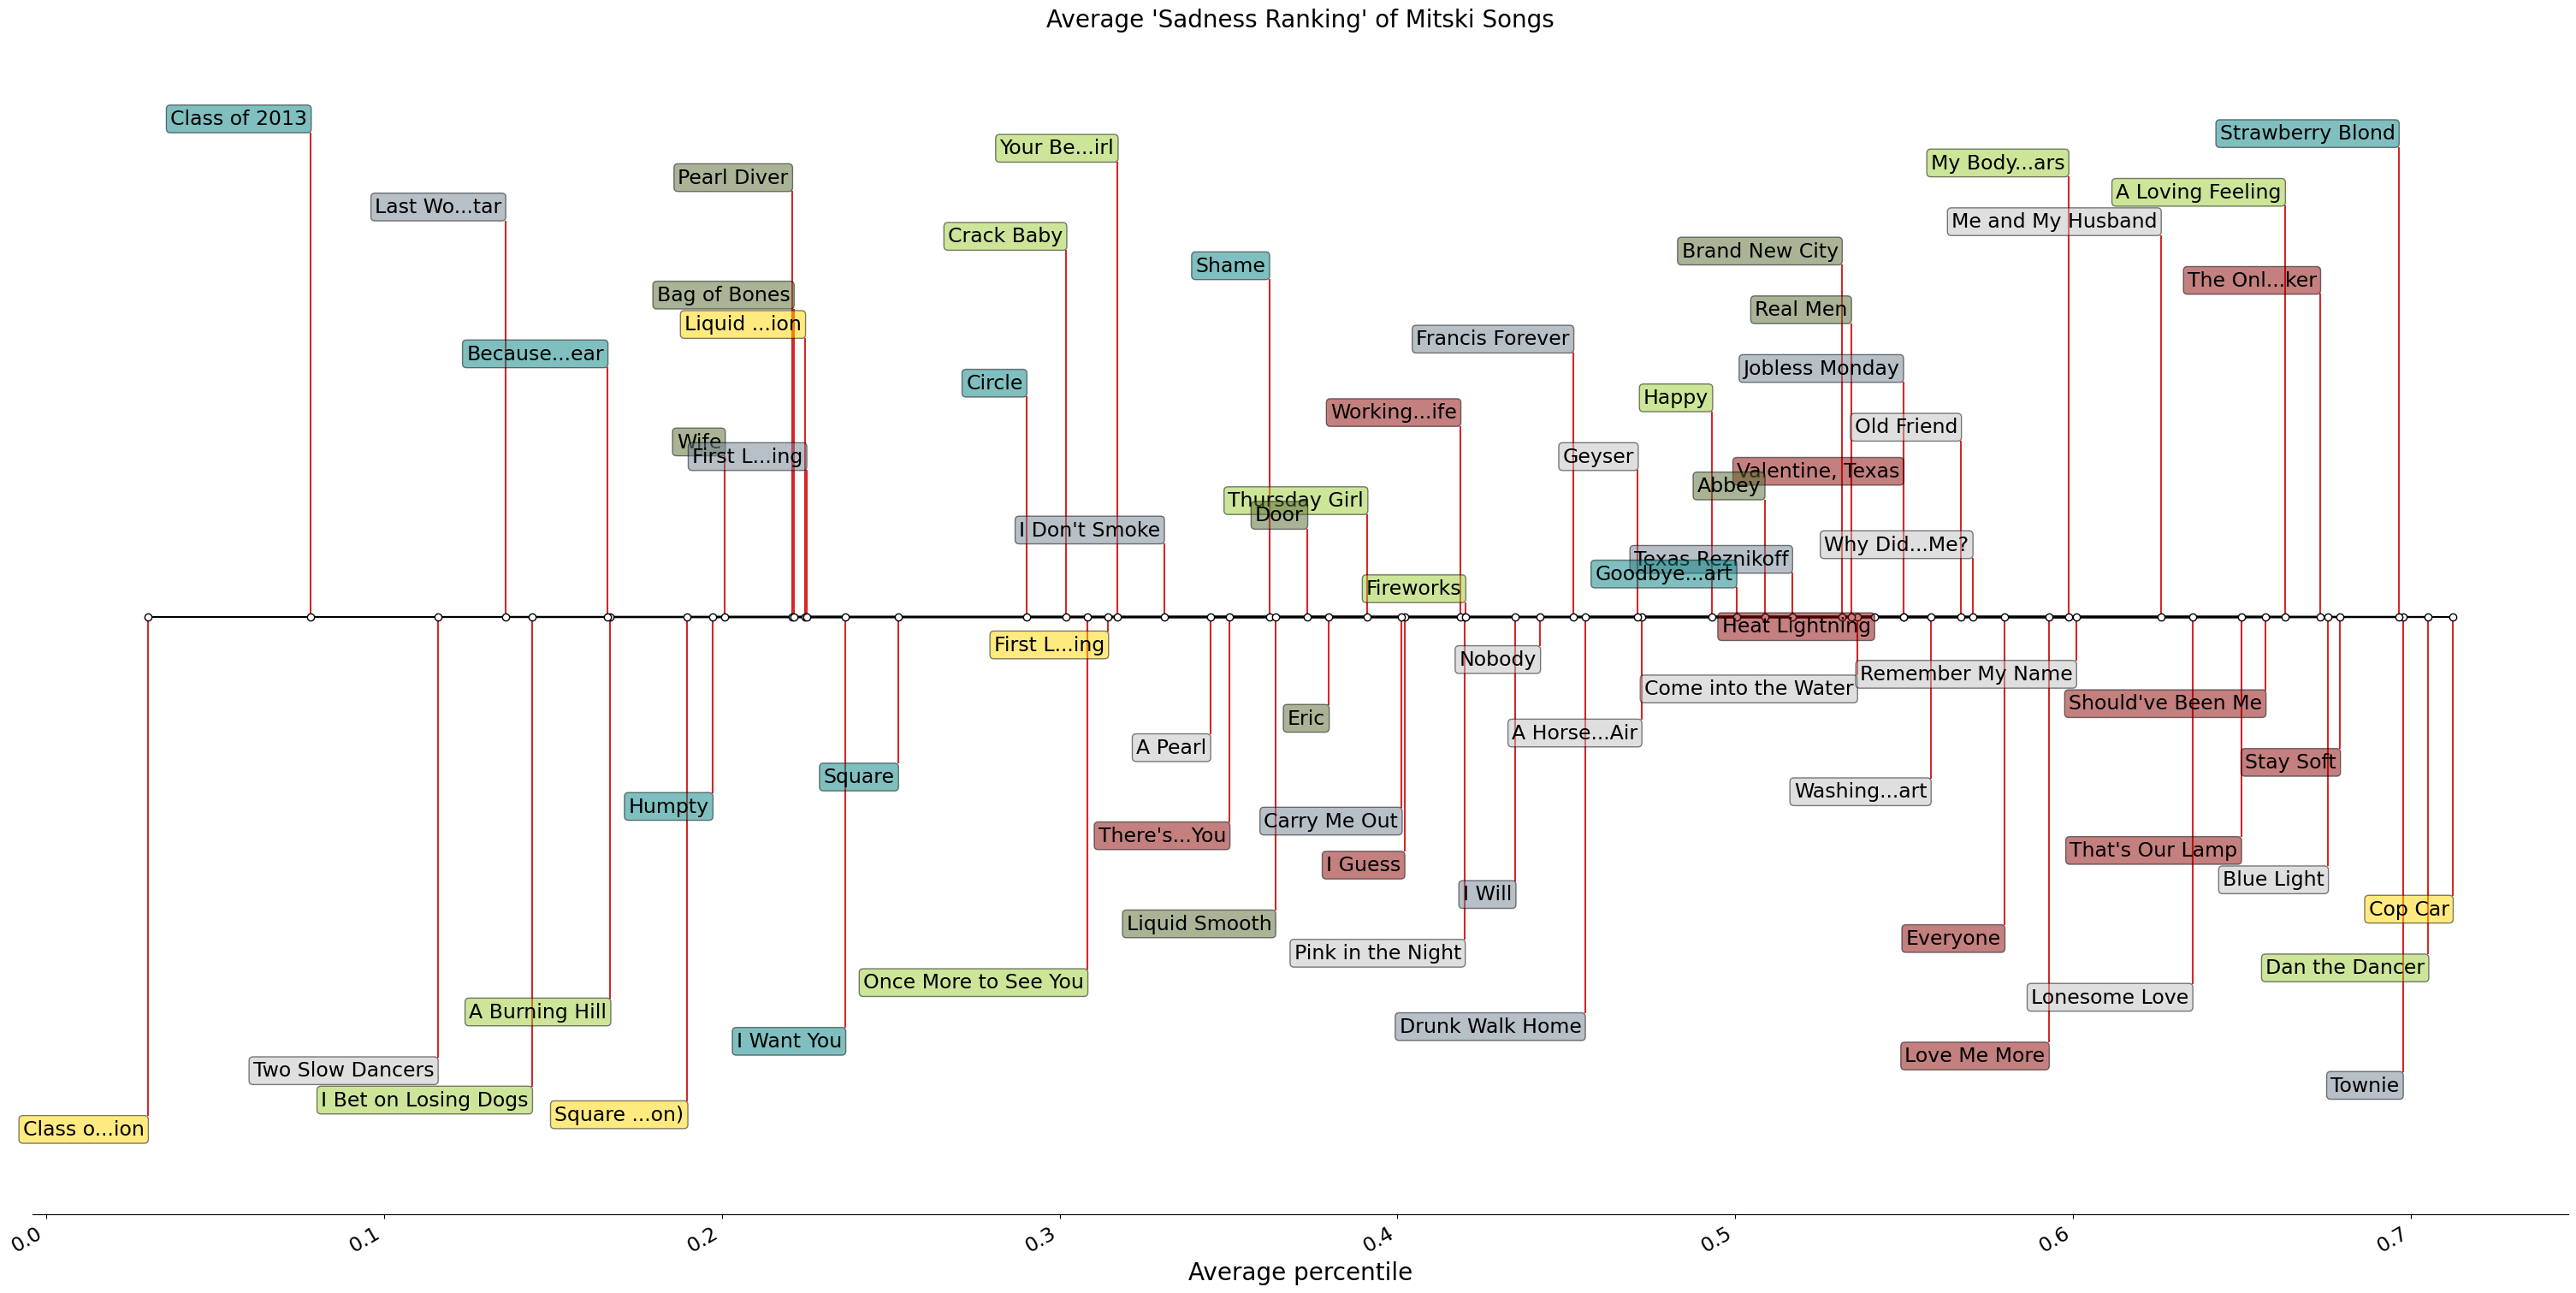

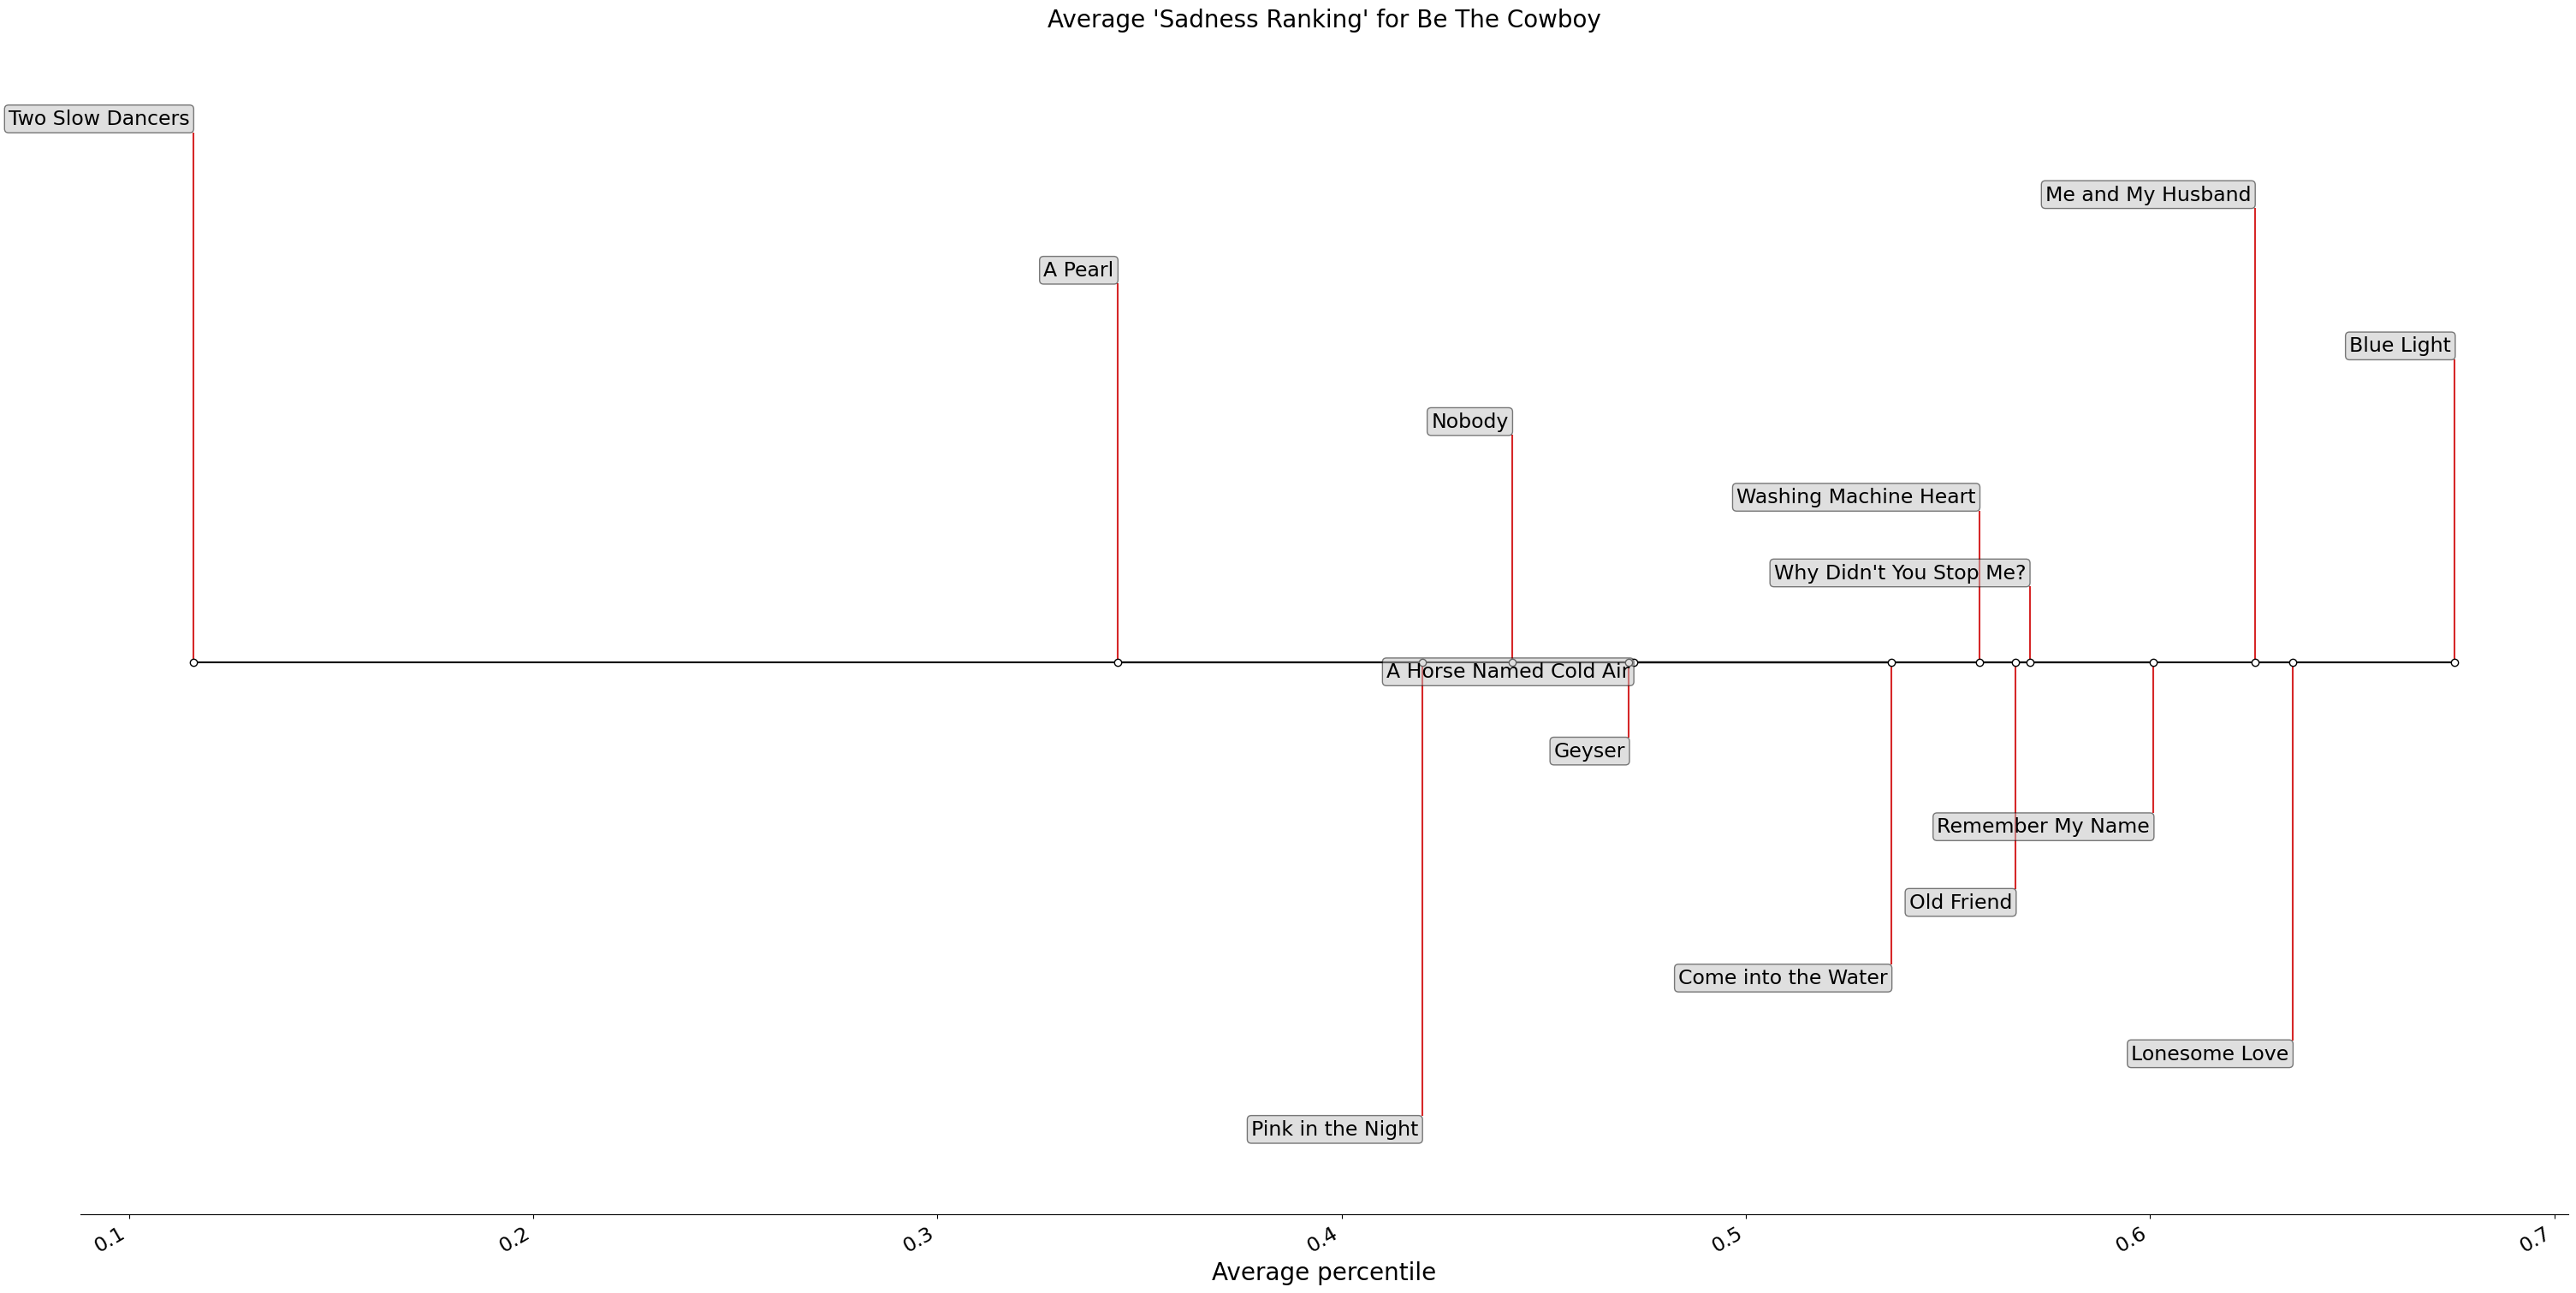

appended


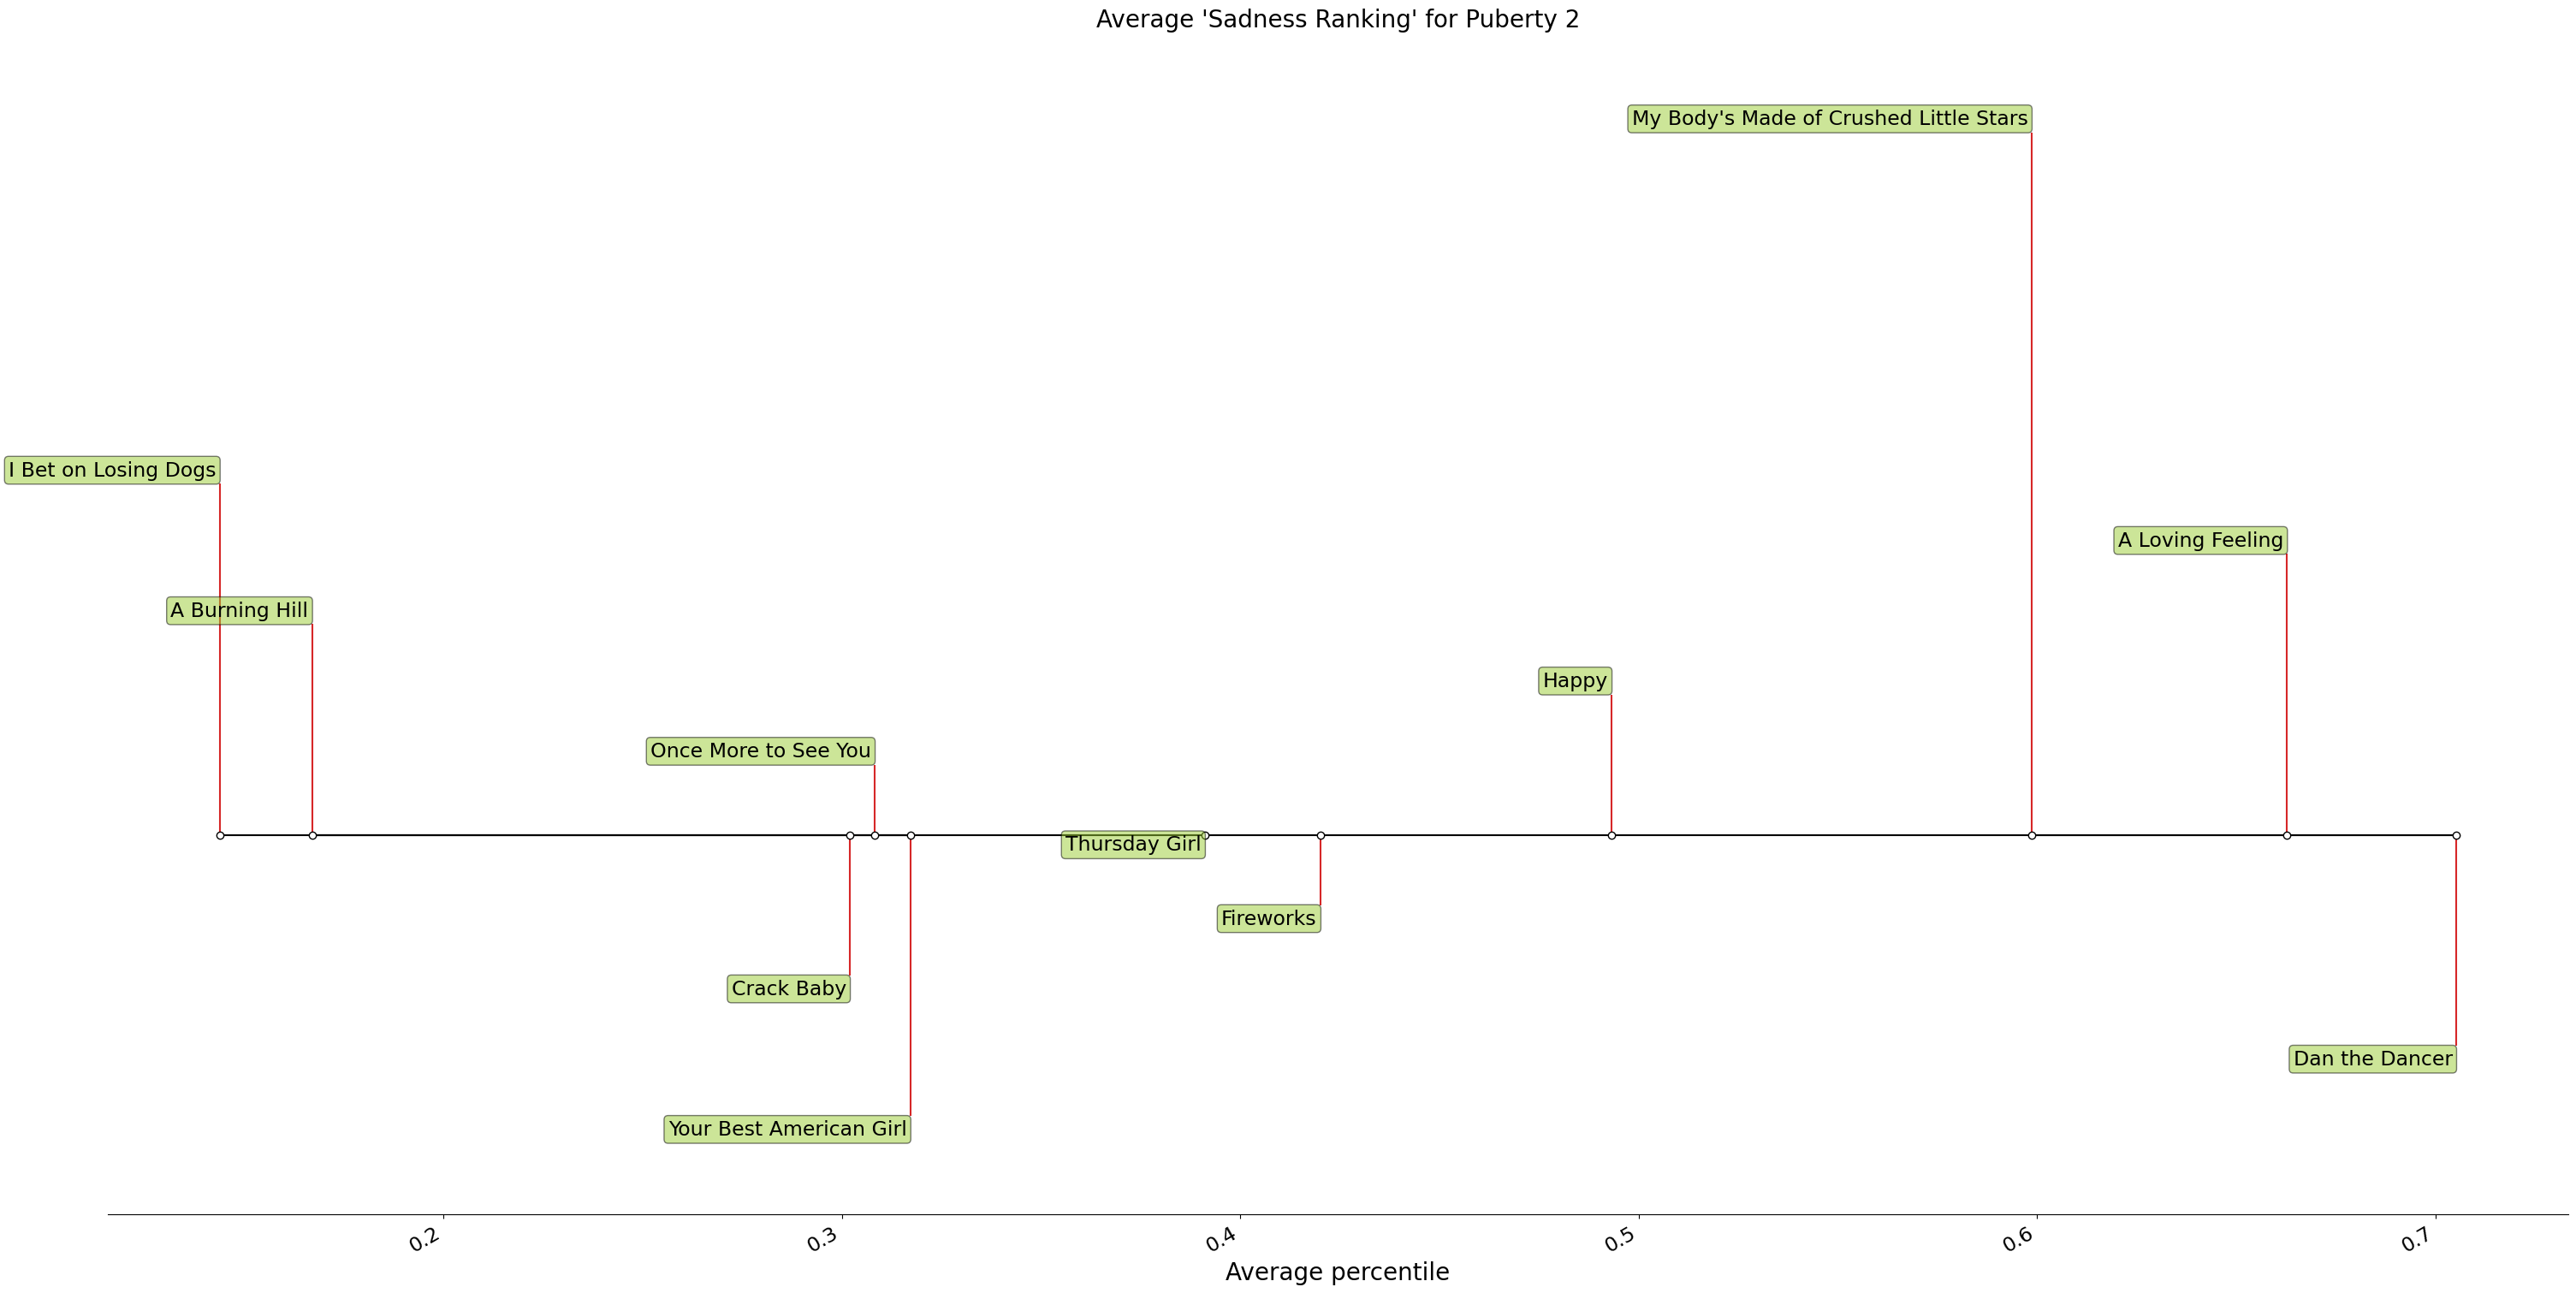

In [242]:
graph_songs_percentile(mitski_avg, "Average 'Sadness Ranking' of Mitski Songs")

be_the_cowboy = make_dict_one_album(btc, mitski_avg)
puberty_2 = make_dict_one_album(p2, mitski_avg)


graph_songs_percentile(be_the_cowboy, "Average 'Sadness Ranking' for Be The Cowboy", 40)
graph_songs_percentile(puberty_2, "Average 'Sadness Ranking' for Puberty 2", 40)

From the visual above you'll see we found that Mitski’s saddest songs are “Class of 2013 - Live Audiotree Version”, “Class of 2013”, and “Two Slow Dancers”. Mitski’s happiest songs are "Townie", “Dan the Dancer”, and “Cop Car”. Breaking down the saddest songs by album for Mitski, Laurel Hell and Be the Cowboy were rated as being on the happier side while the songs from Puberty 2 and Bury Me At Makeout Creek are more spread-out.

appended


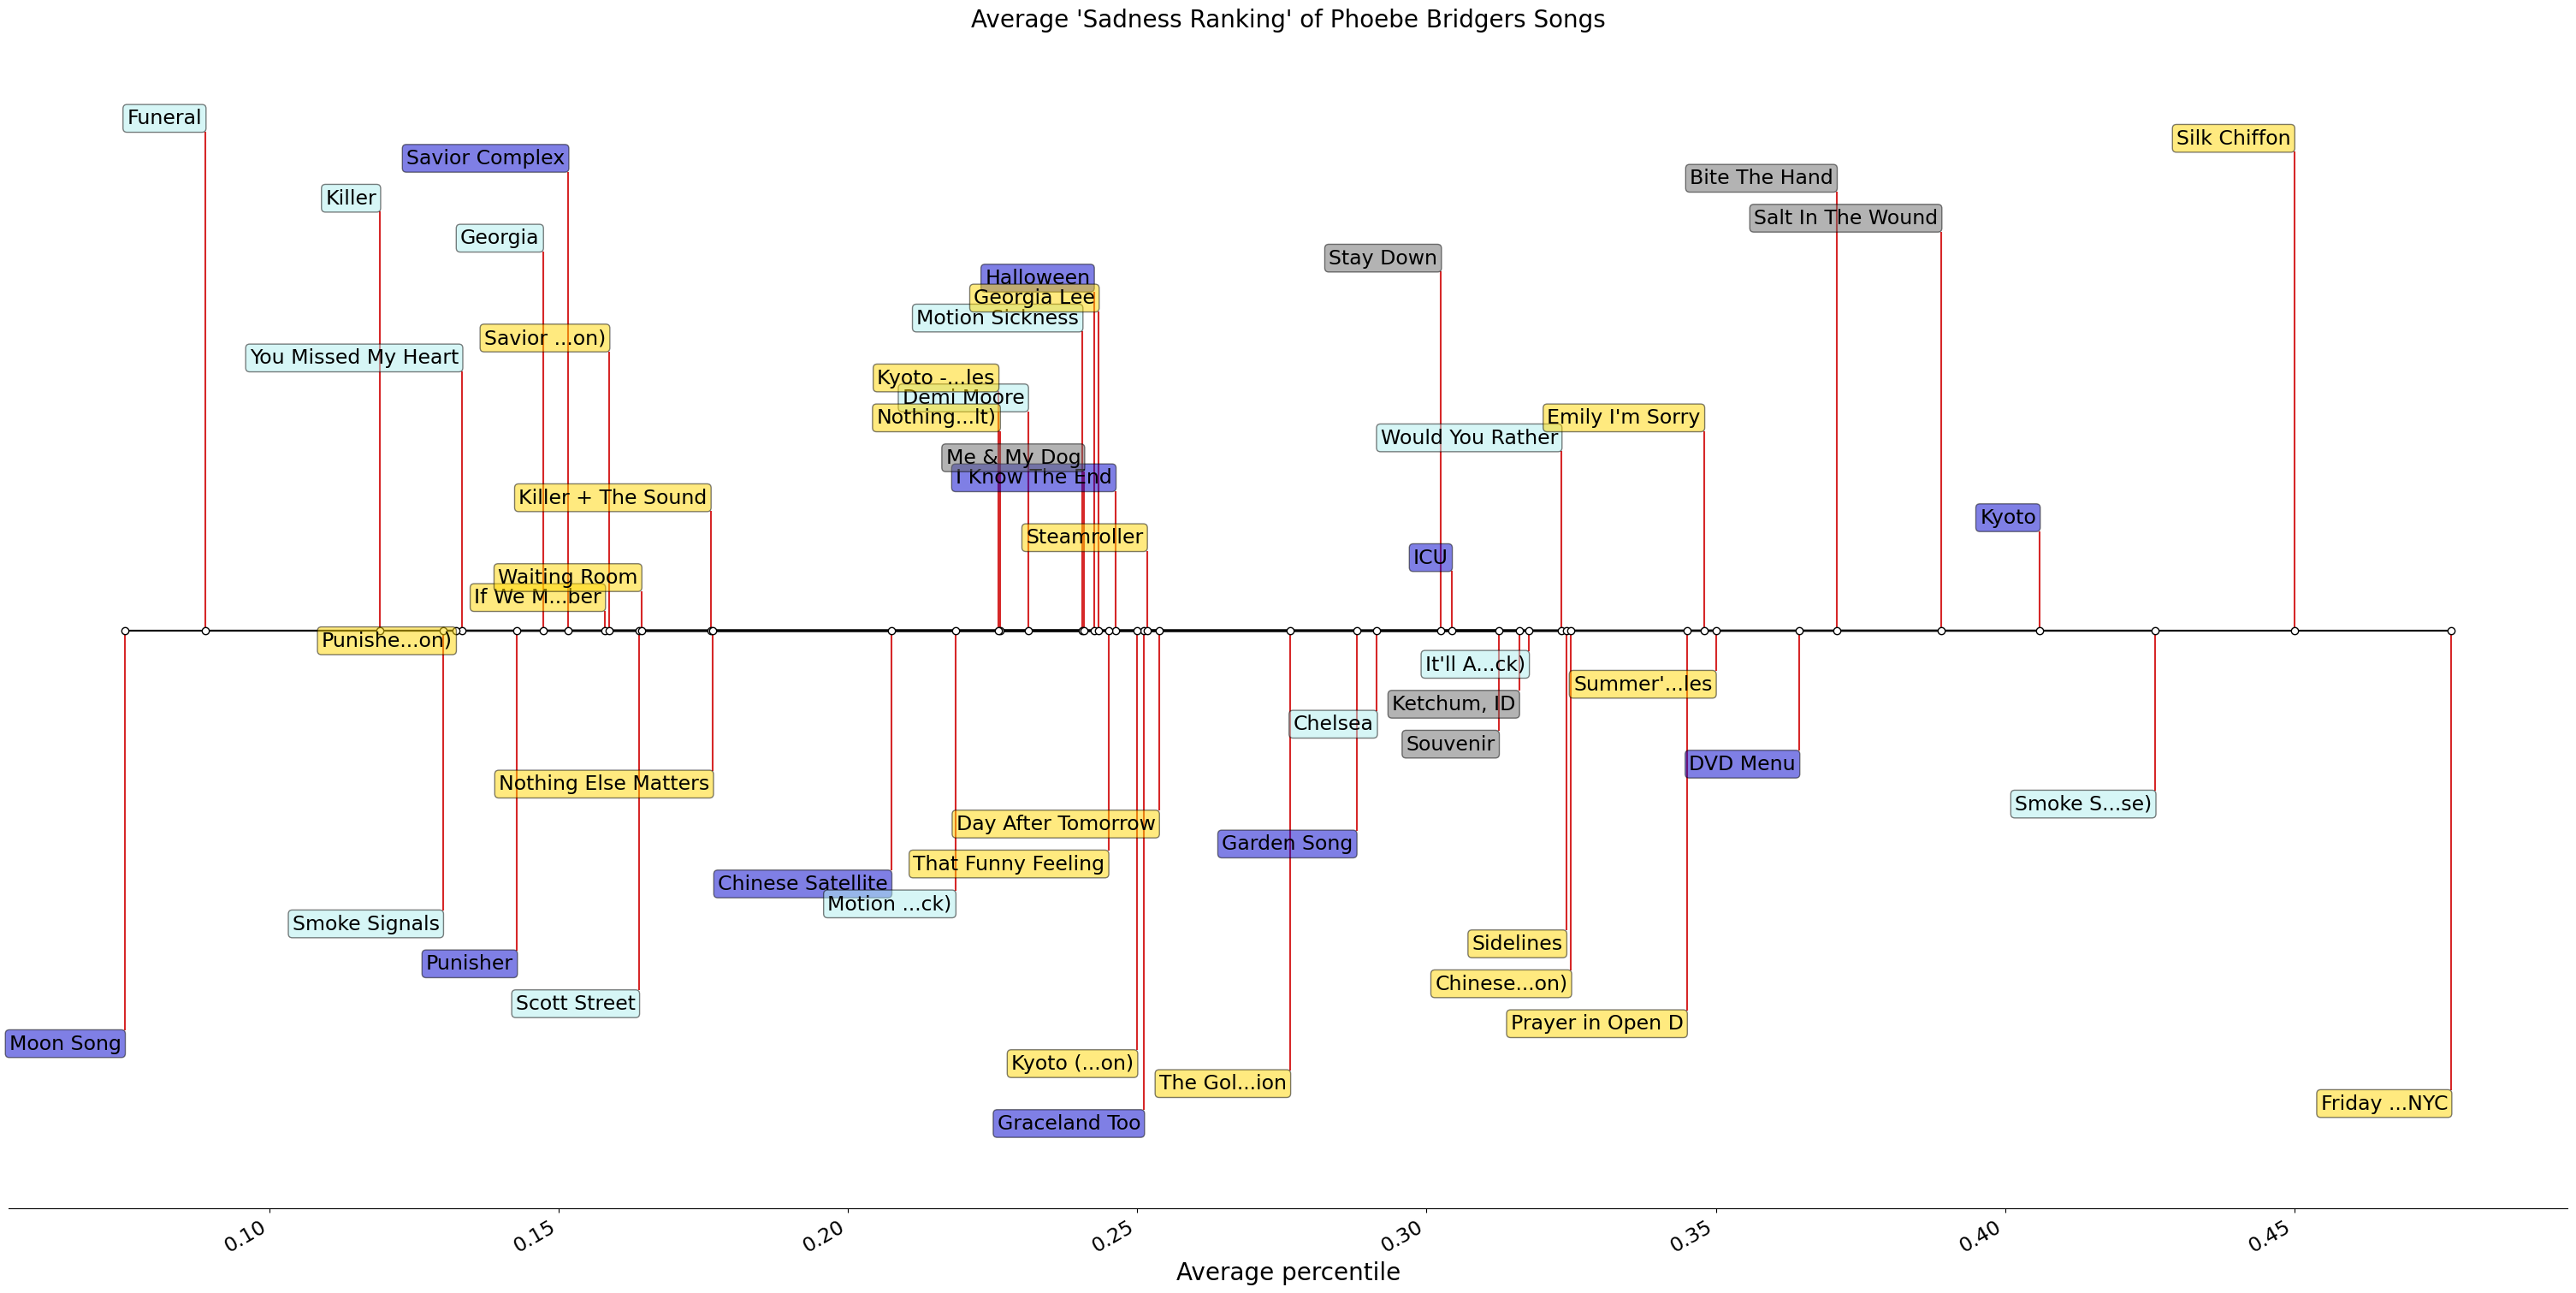

appended


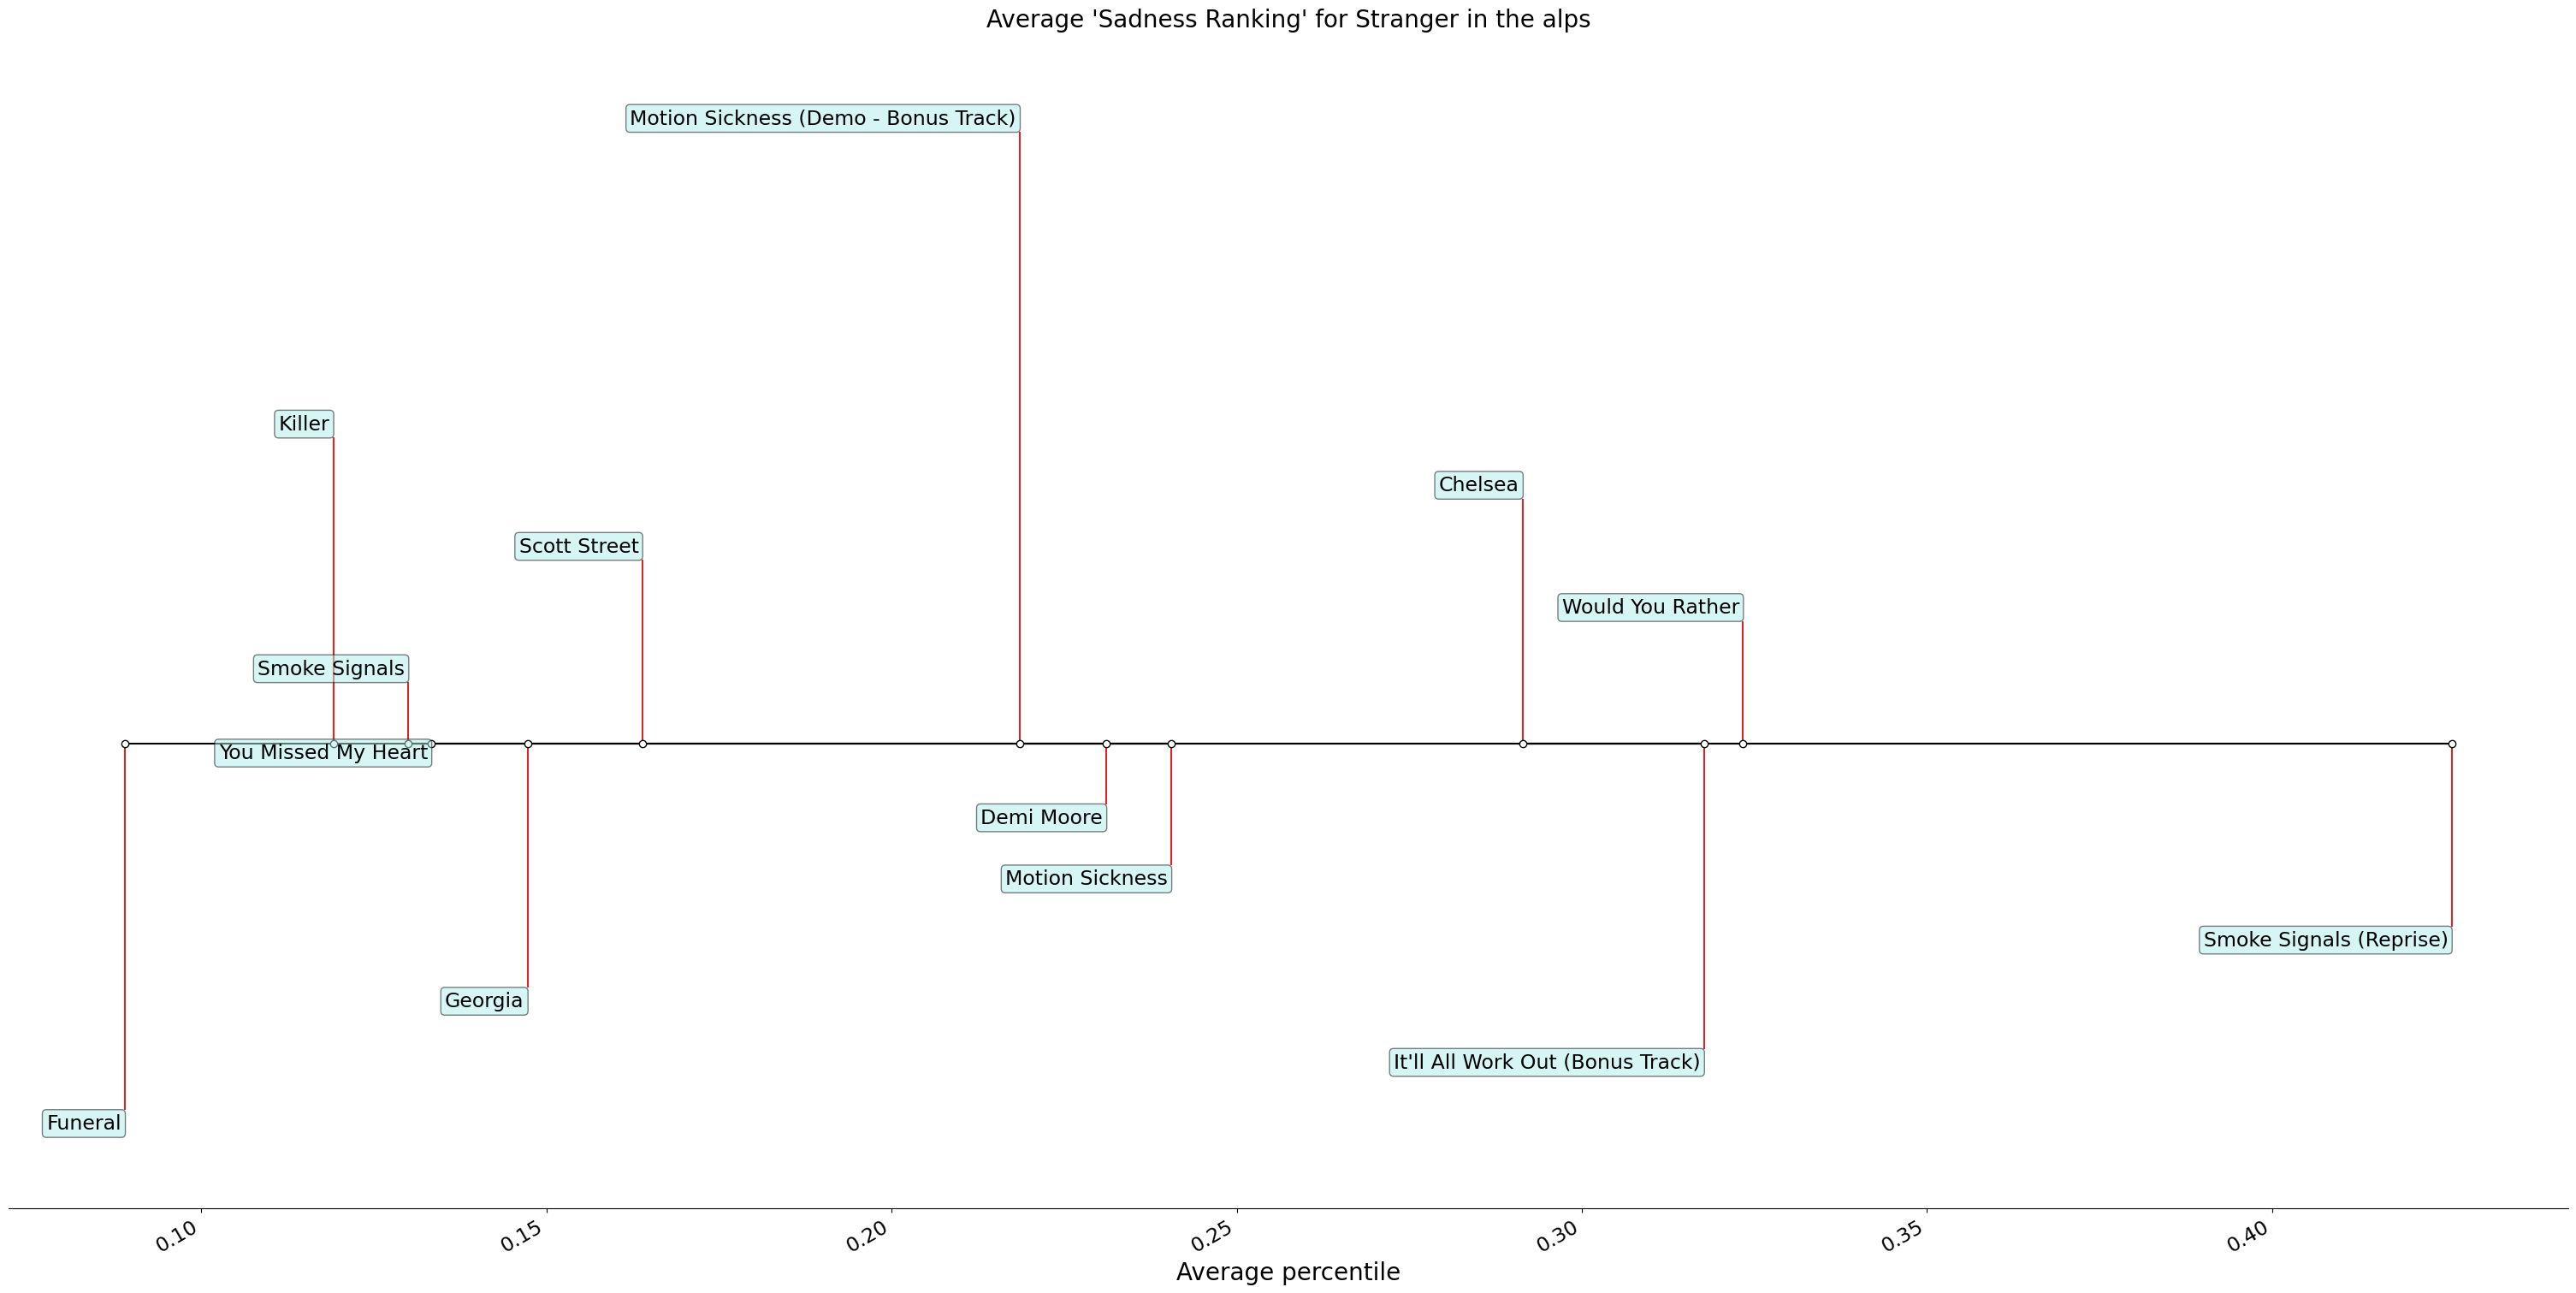

appended


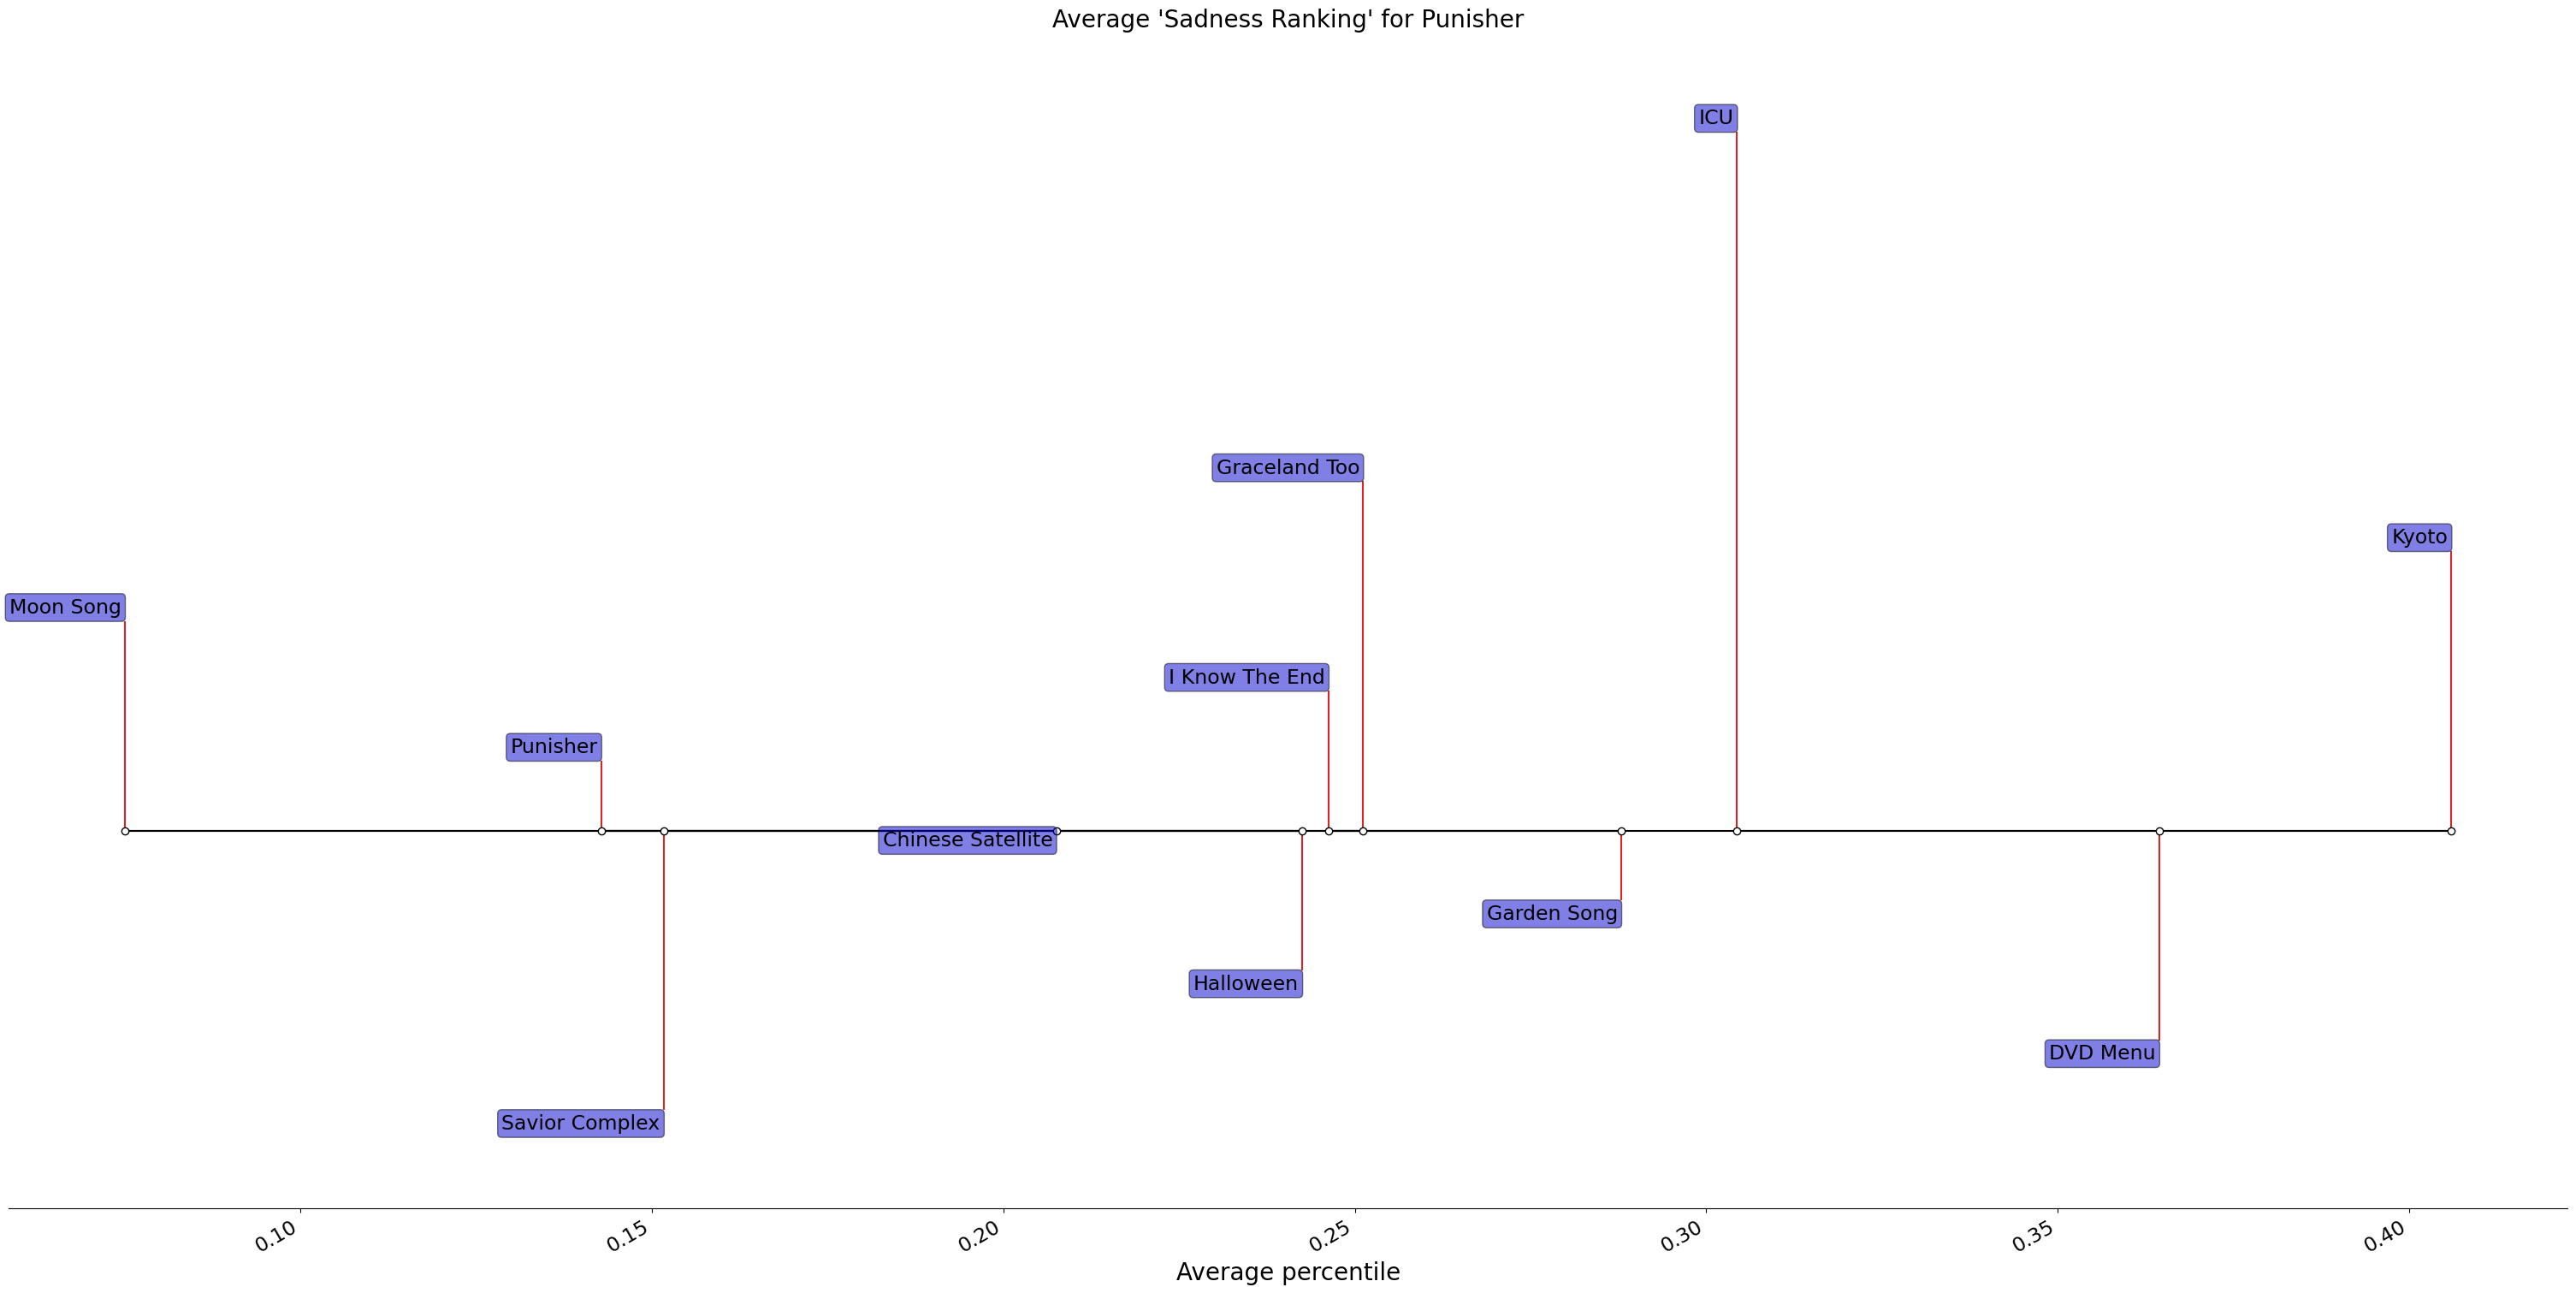

In [243]:
graph_songs_percentile(phoebe_avg, "Average 'Sadness Ranking' of Phoebe Bridgers Songs")

stranger_in_the_alps = make_dict_one_album(sita, phoebe_avg)
punisher1 = make_dict_one_album(punisher, phoebe_avg)
graph_songs_percentile(stranger_in_the_alps, "Average 'Sadness Ranking' for Stranger in the alps", 40)
graph_songs_percentile(punisher1, "Average 'Sadness Ranking' for Punisher", 40)

Next, we found that Phoebe’s saddest songs are “Funeral”, “Moon Song”, and “Killer”. Phoebe’s happiest songs are “Friday I’m In Love - Recorded at Spotify Studios NYC”, “Silk Chiffon”, and "Smoke Signals (Reprise)". Breaking down the saddest songs by album for Phoebe, it appears that no one album was that much sadder than the others: Songs from across all four albums received a mix of rankings.

#### The Least and Most Controversial Songs

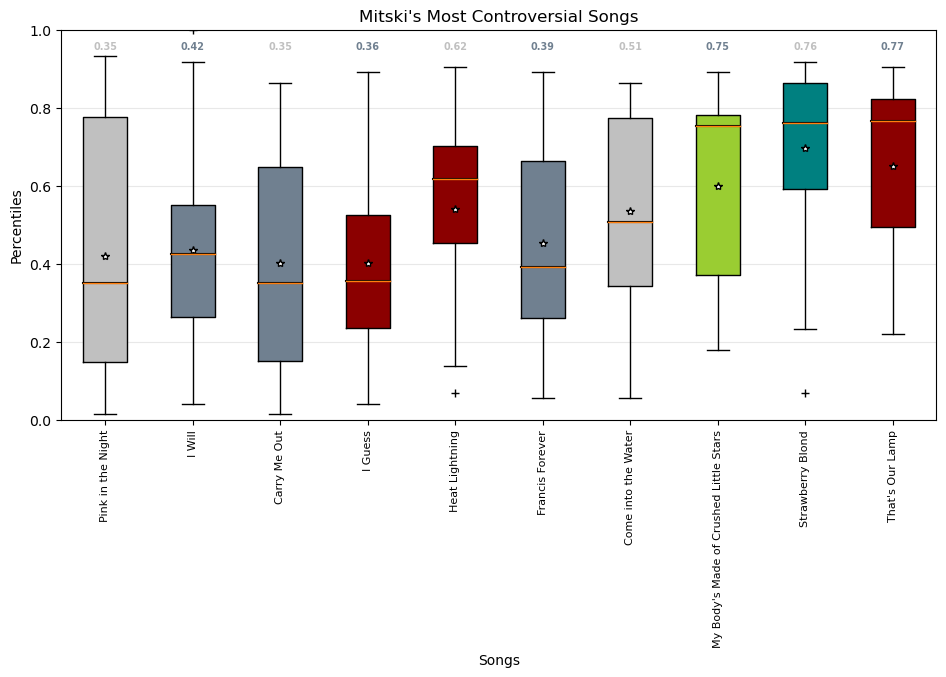

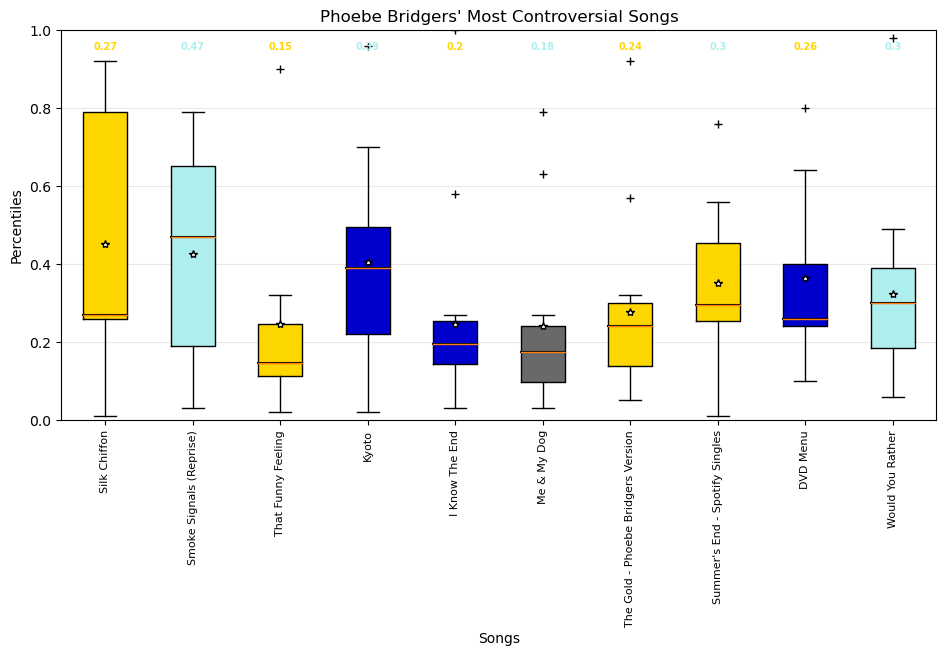

In [244]:
make_boxplot_songs(mitski_most_cont, "Mitski's Most Controversial Songs")
make_boxplot_songs(phoebe_most_cont, "Phoebe Bridgers' Most Controversial Songs")

Many of Mitski’s most controversial songs, such as “Pink in the Night”, “I Will”, and “Carry Me Out”, lie in the middle of the sadness rankings. This is the case because there were strong opinions pulling these songs to both sides, and so they ended up falling in the middle. The exception to this is “Strawberry Blond”, which was ranked as the third happiest of Mitski’s songs overall. Phoebe is more complex–quite a few of the songs ranked as Phoebe’s happiest overall, such as “Kyoto”, “Sidelines”, and “Friday I’m in Love - Recorded at Spotify Studios NYC”, were also her most controversial.

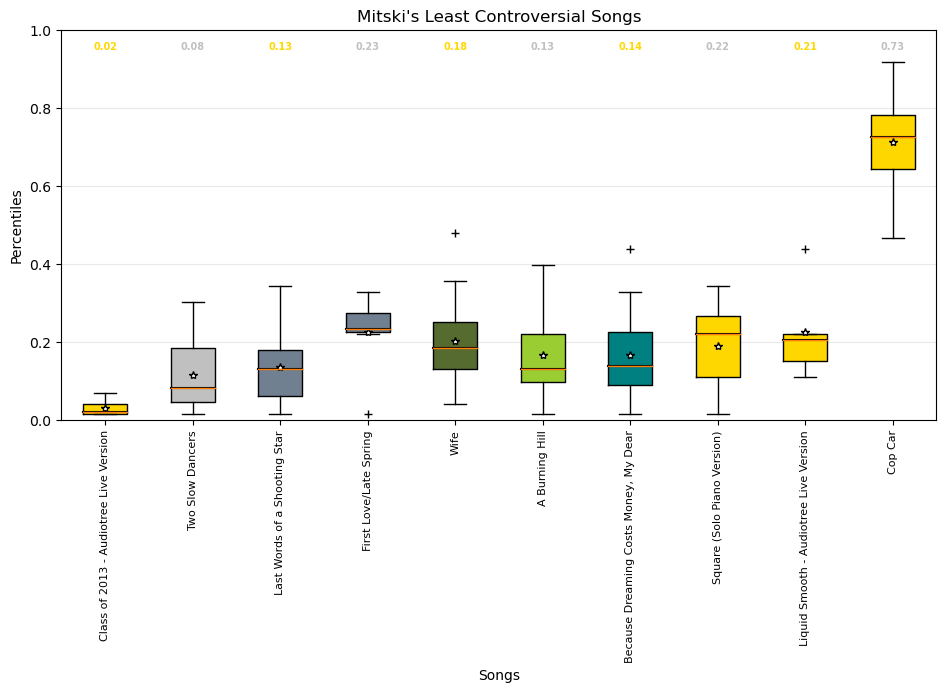

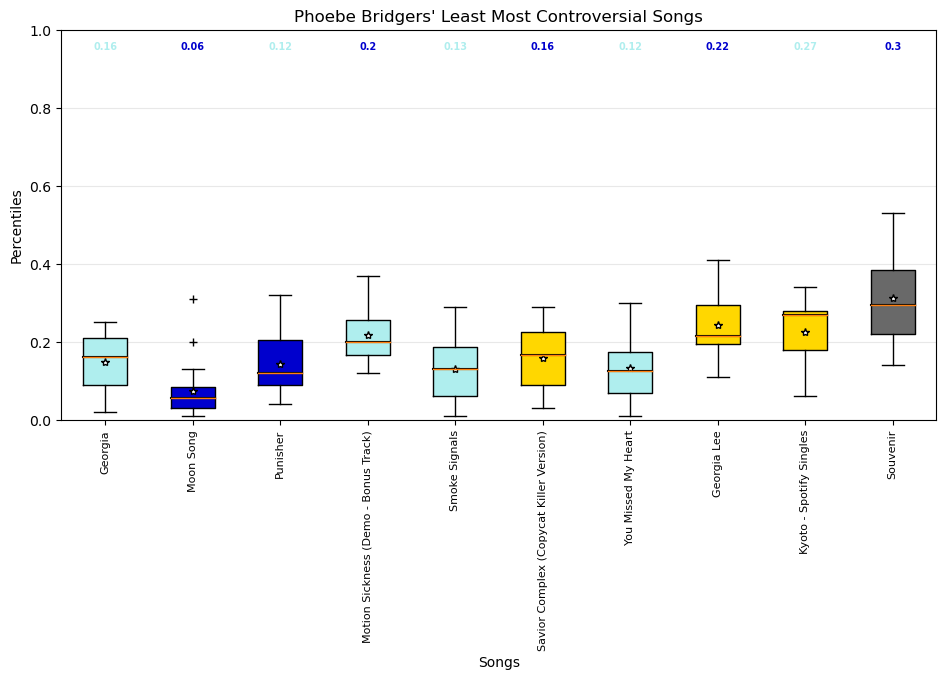

In [245]:
make_boxplot_songs(mitski_least_cont, "Mitski's Least Controversial Songs")
make_boxplot_songs(phoebe_least_cont, "Phoebe Bridgers' Least Most Controversial Songs")

For Mitski, most of her saddest songs–including “Class of 2013 - Live Audiotree Version”, “Two Slow Dancers”, and “Last Words of a Shooting Star”–were among the least controversial. Phoebe is again more complicated, with the very sad “Moon Song” making the top ten for her least controversial songs but with “Smoke Signals”, one of her happiest, making the list as well.

### Interpretation 

When we started this project, we knew our results would reveal the saddest and most controversial Mitski and Phoebe songs. These results were interesting to us due to not only our personal interests in these artists but because of their tie-in to the larger connection we were exploring between popularity and controversy.
The level of sadness that a song grapples with plays a role in its overall vulnerability. Looking at a pool of songs that our data has shown to be both highly vulnerable and controversial, then, gives us insight into a potential positive correlation between popularity and an artist’s willingness to be open with the world through their lyricism (among other elements of song-writing).

Zooming into the more specific patterns emerging from this project, considering Mitski’s data paints two pictures: One, that most of the more controversial songs are neither the saddest nor the happiest, but instead exist somewhere in between, and two, that the saddest of Mitski’s songs are more universally agreed-upon and less controversial than the songs in the middle. Phoebe’s data is less clear, with songs that fall into a wide range of sadness rankings being found as the most and least controversial.

As always, there is more to the story here. Both Mitski and Phoebe are fairly well-known artists already. Future projects might involve sadness/controversy rankings for artists of varying popularity or an investigation of how the average sadness level of an artist’s songs relates to their level of popularity.

#### Limitations

Our methodology was not perfect, and there are some limitations we must address:

1. Our recognize_anomalies function made to ensure all playlists are in correct order did find some playlists to be in an ambiguous order. Because some playlists may have been ranked in the correct order, it skews our average rankings, and brings some doubt to our controversy boxplots.

2. Certain songs from both Phoebe Bridgers' and Mitski's discographies have multiple versions/recording of the same songs. We choose to include these songs as separate songs with their own rankings, because we observed that different versions of the same song often had notably different rankings on the same playlist. However, because some users only included one version of each song on their playlists, these alternate versions have less data about them, so their average rankings are less reliable.

3. In choosing playlists for our data set, we looked for playlists ranking Phoebe Bridgers and Mitski songs by sadness, but there was a lot of variety in titles, that we felt expressed the same purpose of the playlist. For example, "mitski ranked by cryability" was included in our playlists.
